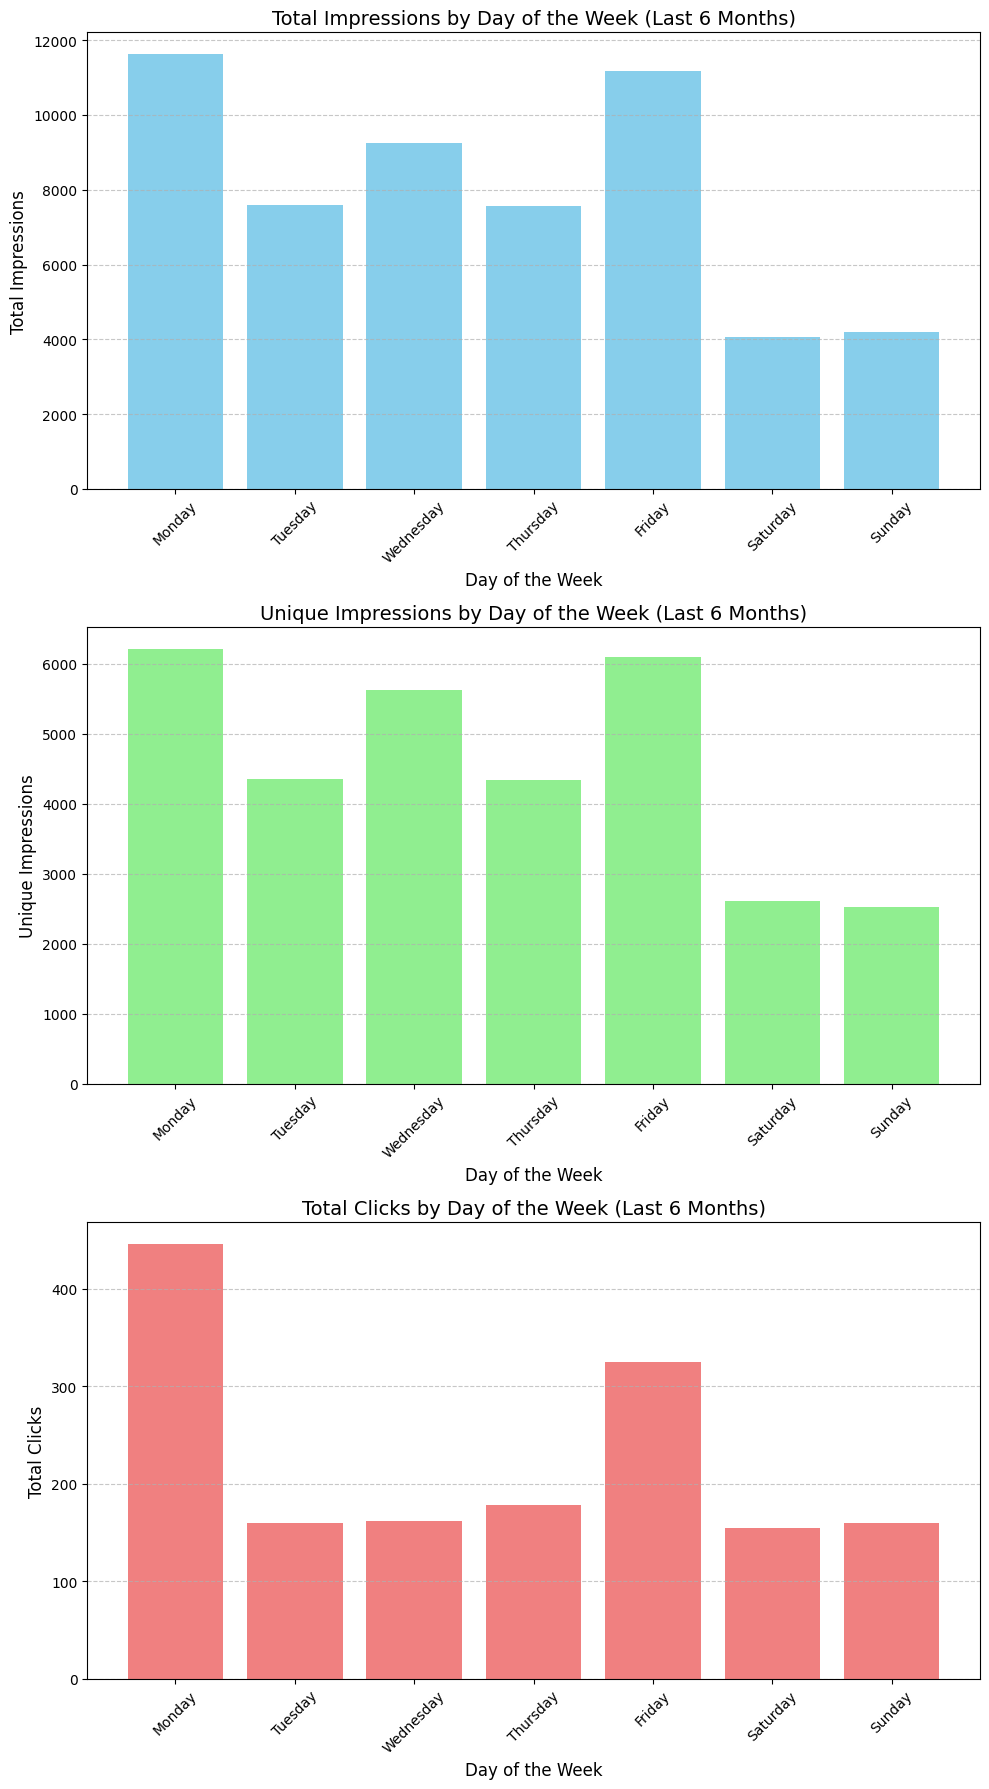

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'knowit-connectivity_content_1708421813693 - Metrics.csv'
data = pd.read_csv(file_path)

# Correcting the column headers
data.columns = data.iloc[0]
data = data[1:]

# Converting 'Date' column to datetime format and other necessary columns to integer type
data['Date'] = pd.to_datetime(data['Date'])
data['Impressions (total)'] = data['Impressions (total)'].astype(int)
data['Unique impressions (organic)'] = data['Unique impressions (organic)'].astype(int)
data['Clicks (total)'] = data['Clicks (total)'].astype(int)

# Filtering the data for the last 6 months and avoiding SettingWithCopyWarning by creating a copy
latest_date = data['Date'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
filtered_data = data[data['Date'] > six_months_ago].copy()

# Adding a new column for the day of the week
filtered_data['Day of Week'] = filtered_data['Date'].dt.day_name()

# Grouping data by 'Day of Week' for each metric
weekly_impressions = filtered_data.groupby('Day of Week')['Impressions (total)'].sum().reset_index()
weekly_unique_impressions = filtered_data.groupby('Day of Week')['Unique impressions (organic)'].sum().reset_index()
weekly_clicks = filtered_data.groupby('Day of Week')['Clicks (total)'].sum().reset_index()

# Sorting the days of the week in order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_impressions['Day of Week'] = pd.Categorical(weekly_impressions['Day of Week'], categories=sorter, ordered=True)
weekly_unique_impressions['Day of Week'] = pd.Categorical(weekly_unique_impressions['Day of Week'], categories=sorter, ordered=True)
weekly_clicks['Day of Week'] = pd.Categorical(weekly_clicks['Day of Week'], categories=sorter, ordered=True)

weekly_impressions = weekly_impressions.sort_values('Day of Week')
weekly_unique_impressions = weekly_unique_impressions.sort_values('Day of Week')
weekly_clicks = weekly_clicks.sort_values('Day of Week')

# Plotting all three metrics together
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Plot for total impressions
ax[0].bar(weekly_impressions['Day of Week'], weekly_impressions['Impressions (total)'], color='skyblue')
ax[0].set_title('Total Impressions by Day of the Week (Last 6 Months)', fontsize=14)
ax[0].set_xlabel('Day of the Week', fontsize=12)
ax[0].set_ylabel('Total Impressions', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for unique impressions
ax[1].bar(weekly_unique_impressions['Day of Week'], weekly_unique_impressions['Unique impressions (organic)'], color='lightgreen')
ax[1].set_title('Unique Impressions by Day of the Week (Last 6 Months)', fontsize=14)
ax[1].set_xlabel('Day of the Week', fontsize=12)
ax[1].set_ylabel('Unique Impressions', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for clicks
ax[2].bar(weekly_clicks['Day of Week'], weekly_clicks['Clicks (total)'], color='lightcoral')
ax[2].set_title('Total Clicks by Day of the Week (Last 6 Months)', fontsize=14)
ax[2].set_xlabel('Day of the Week', fontsize=12)
ax[2].set_ylabel('Total Clicks', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [23]:
# Encode categorical features
for column in df.select_dtypes(include=['object']).columns:
    df[column] = df[column].astype(str)  # Ensure column is treated as string
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])

# Separate the target variable ('views') from the features
X = df.drop('views', axis=1)
y = df['views']

# Apply SelectKBest with chi2 to select the features
k_best_relevant = SelectKBest(score_func=chi2, k='all')
fit_relevant = k_best_relevant.fit(X, y)

# Create a DataFrame to display feature scores
features_scores_relevant = pd.DataFrame({
    'Feature': X.columns,
    'Score': fit_relevant.scores_
}).sort_values(by='Score', ascending=False)

print(features_scores_relevant)

                       Feature         Score
15                     scraped  7.027829e+11
1                   company_id  2.792356e+10
10                      expiry  4.720428e+09
7         original_listed_time  3.444984e+09
12                 listed_time  3.351462e+09
0                       job_id  1.378258e+08
8              job_posting_url  4.777918e+05
6                      applies  4.721927e+05
3                  description  4.390861e+05
2                        title  3.465977e+05
5                     location  9.489466e+04
11  formatted_experience_level  7.985491e+02
13                   sponsored  4.030190e+02
9             application_type  3.707200e+02
4          formatted_work_type  2.295796e+02
14                   work_type  2.295796e+02


In [24]:
# analyze the description for more views and aplications
# Create a TfidfVectorizer
vectorizer = TfidfVectorizer()

# Apply the vectorizer
X = vectorizer.fit_transform(df['description'].astype(str))
y = df['views']

# Split the data into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a LinearRegression model
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Predict the target variable
y_pred = model.predict(X_test)

# Print the R2 score
print(r2_score(y_test, y_pred))

# Print the mean squared error
print(mean_squared_error(y_test, y_pred))

# Create a DataFrame with the features and coefficients
df = pd.DataFrame({
    'feature': vectorizer.get_feature_names(),
    'coef': model.coef_
})

# Sort the DataFrame by the coefficient
df = df.sort_values('coef', ascending=False)

# Display the 10 most positive words
print(df.head(10))

# Display the 10 most negative words
print(df.tail(10))



-0.07842731959569749
51615.36018540888
['10' '100' '1000' ... '997' '998' '999']
     feature         coef
2364    3129  3534.333333
632     1569  3330.333333
1883    2696  2355.333333
2309     308  2141.333333
3655     665  2008.333333
2466    3220  1762.333333
2698     343  1712.333333
3564     582  1588.333333
1524    2372  1432.333333
2187     297  1427.333333
     feature       coef
872     1785 -71.666667
180     1161 -71.666667
2749    3476 -71.666667
331     1298 -71.666667
3535     556 -71.666667
1301    2171 -71.666667
3672     680 -71.666667
3674     682 -71.666667
2227    3005 -71.666667
503     1452 -71.666667
